In [28]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Constants

In [6]:
MU0 = 4 * np.pi * 1e-7
MAGNET_M = 290.86 
p_vec = np.array([0,0.22,0])
 

Magnetic field Equation

In [8]:
def magnetic_field_bar(mu0, mag, p_vec):
    r = np.linalg.norm(p_vec)
    p_hat = p_vec/r
    constant = (mu0*mag)/(4*np.pi*r**3)
    term1 = (3* np.outer(p_hat, p_hat)) - np.eye(3)
    return constant*term1

Deriving Magnetic gradient term using sympy. We derive this and then check if the paper matches.

In [21]:
m_0, M_a = sp.symbols('m_u0 M_A', real = True)
px, py, pz = sp.symbols('px py pz', real=True)
mx, my, mz = sp.symbols('mx my mz', real=True)

p = sp.Matrix([px, py, pz])
mhat = sp.Matrix([mx, my, mz])
I3 = sp.eye(3)
pnorm = sp.sqrt(p.dot(p))
phat = p/pnorm
outer = phat * phat.T

const = (m_0 * M_a)/(4*sp.pi*pnorm**3)
term1 = 3* outer - I3
b= const * term1 * mhat
J = b.jacobian(p)

pmT = phat*mhat.T
pTm = (phat.T * mhat)[0]
mpT = mhat * phat.T
Z = I3 - 5*outer
const_grad = (3*m_0*M_a)/(4*sp.pi*pnorm**4)
grad_b = const_grad*(pmT+pTm*I3+Z*mpT)
print(sp.simplify(J-grad_b))




Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])


In [54]:
def magnetic_field_gradient(p_vec, m_vec, mu0, M_A):
    r = np.linalg.norm(p_vec)
    p_hat = p_vec/r
    pmT = np.outer(p_hat, m_vec)
    pTm = np.dot(p_hat, m_vec)
    mpT = np.outer(m_vec, p_hat)
    ppT = np.outer(p_hat, p_hat)
    Z = I3 - (5*ppT)
    const_grad = (3*mu0*M_A)/(4*np.pi*r**4)
    grad_b = const_grad*(pmT+pTm*I3+Z*mpT)*-1
    return grad_b

In [55]:
e1 = np.array([1.0, 0.0, 0.0])
e2 = np.array([0.0, 1.0, 0.0])
e3 = np.array([0.0, 0.0, 1.0])
grad_b1 = magnetic_field_gradient(p_vec, e1, MU0, MAGNET_M)
grad_b2 = magnetic_field_gradient(p_vec, e2, MU0, MAGNET_M)
grad_b3 = magnetic_field_gradient(p_vec, e3, MU0, MAGNET_M)
grad_b_stack = np.column_stack([grad_b1, grad_b2, grad_b3])


Plotting magnetic field

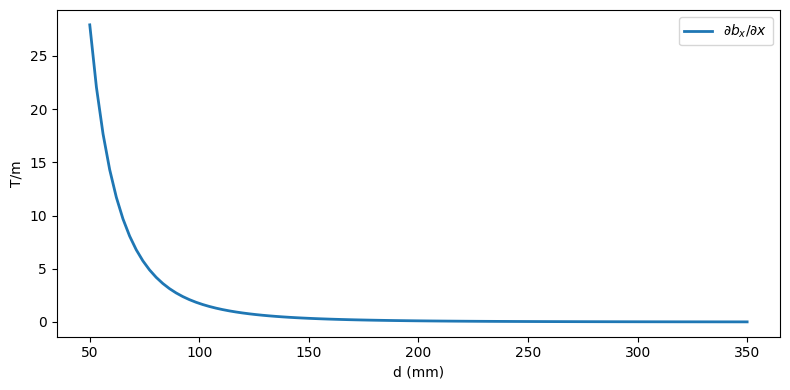

In [56]:
distances = np.linspace(0.05, 0.35, 100)  # meters
gb_xx = np.empty_like(distances)

for i, d in enumerate(distances):
    p_value = np.array([d, 0.0, 0.0])      # sample along x-axis
    G = magnetic_field_gradient(p_value, e1, MU0, MAGNET_M)
    gb_xx[i] = G[0, 0]                      # ∂b_x/∂x

plt.figure(figsize=(8,4))
plt.plot(distances*1e3, gb_xx, lw=2, label=r'$\partial b_x/\partial x$')
plt.xlabel('d (mm)'); plt.ylabel('T/m'); plt.legend(); plt.tight_layout(); plt.show()



Spatial Magnetic Gradient along the x direciton 

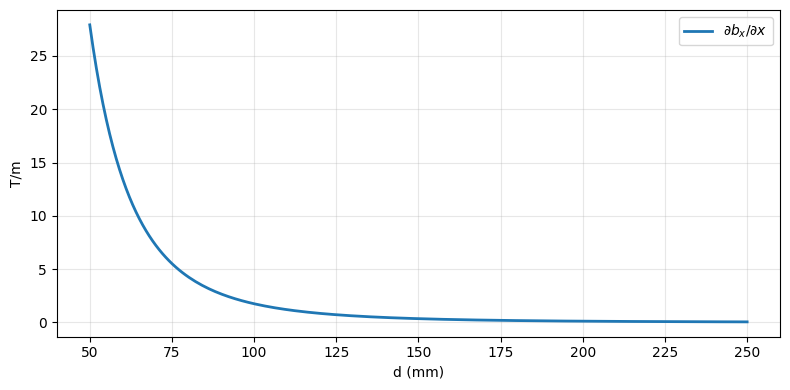

In [ ]:
distances = np.linspace(0.05, 0.25, 200)

vals = []
for d in distances:
    p_value = np.array([d, 0.0, 0.0])
    G = magnetic_field_gradient(p_value, e1, MU0, MAGNET_M)
    vals.append((G[0, 0]))


plt.figure(figsize=(8,4))
plt.plot(distances, vals, lw=2, label=r'$\partial b_x/\partial x$')
plt.xlabel('d (m)')
plt.ylabel('T/m')
plt.grid(True)
plt.legend()
plt.show()

Spatial Gradient along the y direction

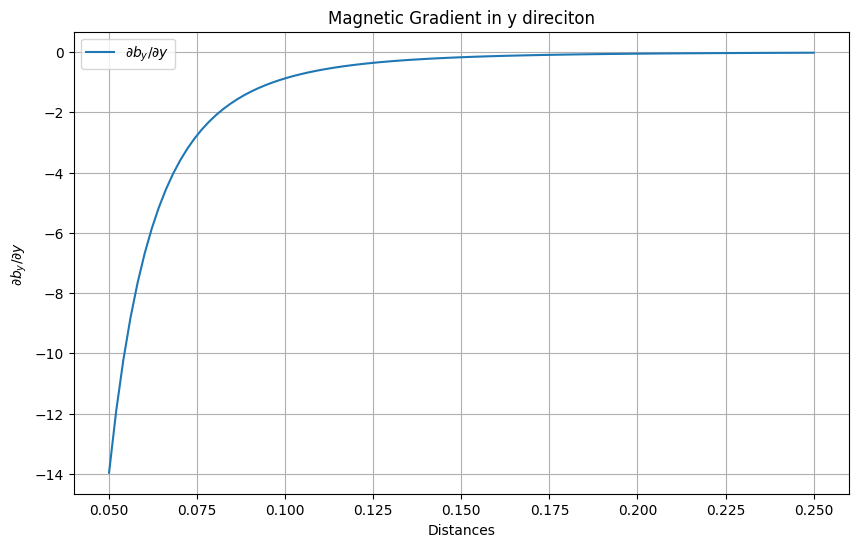

In [ ]:
distances = np.linspace(0.05, 0.25, 100)
y_field = []
for d in distances:
    p_vec = np.array([0.0,d,0.0])
    b_grad = magnetic_field_gradient(p_vec, e2, MU0, MAGNET_M)
    y_field.append((b_grad[0,0]))
plt.figure(figsize=(10,6))
plt.plot(distances, y_field, label = r'$\partial b_y/ \partial y$')
plt.xlabel("Distance (m)")
plt.ylabel(r'$\partial b_y/ \partial y$')
plt.title("Magnetic Gradient in y direciton")
plt.legend()
plt.grid(True)
plt.show()